# Library

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# Import Data Train

In [23]:
Training = pd.read_csv('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/Training.csv')
Training

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50,Label
0,1,-0.3299,0.108834,39.5003,65.228653,21,24,53,32,21,...,2.078850,23.122212,7.980207,12.598607,3660.0,50.0,4.455,174.0,8.200659,1
1,1,-1.1845,1.403040,56.3007,67.606411,15,17,59,32,27,...,2.078850,23.515914,7.980207,12.992309,3660.0,50.0,3.761,174.0,7.585027,1
2,1,0.0239,0.000571,40.3193,66.479653,21,24,56,35,21,...,2.061687,27.759960,7.980217,12.622195,4707.0,56.0,5.473,192.0,8.356547,1
3,1,-0.4296,0.184556,42.6228,76.076204,22,24,63,35,28,...,2.073639,13.576254,7.383352,6.192902,4488.0,56.0,9.798,186.0,7.638272,1
4,1,-0.6399,0.409472,59.7313,78.211790,18,19,66,36,30,...,2.067160,16.538268,9.962622,6.575646,4746.0,59.0,8.900,192.0,5.778325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,-1.0395,1.080560,40.0833,65.908653,21,24,54,33,21,...,2.077272,23.077169,7.980215,15.096953,4007.0,52.0,3.707,178.0,7.017729,0
156,1,-0.7613,0.579578,43.3476,68.575825,21,24,58,33,25,...,2.076737,23.618312,7.947877,15.670436,4051.0,50.0,4.322,178.0,7.419075,1
157,1,-0.9778,0.956093,65.8072,85.634169,21,23,73,40,33,...,2.085108,23.314449,13.567397,9.747052,6854.0,66.0,7.504,216.0,8.004365,1
158,1,-0.4468,0.199630,33.7560,59.041481,21,24,47,30,17,...,2.067135,22.964834,7.836884,12.584556,3071.0,45.0,3.576,166.0,7.522879,1


In [24]:
y_train = Training['Label']
y_train

0      1
1      1
2      1
3      1
4      0
      ..
155    0
156    1
157    1
158    1
159    0
Name: Label, Length: 160, dtype: int64

In [25]:
X_train = Training.drop(['Label'], axis = 1)
X_train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
0,1,-0.3299,0.108834,39.5003,65.228653,21,24,53,32,21,...,66.523208,2.078850,23.122212,7.980207,12.598607,3660.0,50.0,4.455,174.0,8.200659
1,1,-1.1845,1.403040,56.3007,67.606411,15,17,59,32,27,...,66.523208,2.078850,23.515914,7.980207,12.992309,3660.0,50.0,3.761,174.0,7.585027
2,1,0.0239,0.000571,40.3193,66.479653,21,24,56,35,21,...,72.159057,2.061687,27.759960,7.980217,12.622195,4707.0,56.0,5.473,192.0,8.356547
3,1,-0.4296,0.184556,42.6228,76.076204,22,24,63,35,28,...,72.577369,2.073639,13.576254,7.383352,6.192902,4488.0,56.0,9.798,186.0,7.638272
4,1,-0.6399,0.409472,59.7313,78.211790,18,19,66,36,30,...,74.417748,2.067160,16.538268,9.962622,6.575646,4746.0,59.0,8.900,192.0,5.778325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,-1.0395,1.080560,40.0833,65.908653,21,24,54,33,21,...,68.549963,2.077272,23.077169,7.980215,15.096953,4007.0,52.0,3.707,178.0,7.017729
156,1,-0.7613,0.579578,43.3476,68.575825,21,24,58,33,25,...,68.532315,2.076737,23.618312,7.947877,15.670436,4051.0,50.0,4.322,178.0,7.419075
157,1,-0.9778,0.956093,65.8072,85.634169,21,23,73,40,33,...,83.404336,2.085108,23.314449,13.567397,9.747052,6854.0,66.0,7.504,216.0,8.004365
158,1,-0.4468,0.199630,33.7560,59.041481,21,24,47,30,17,...,62.014043,2.067135,22.964834,7.836884,12.584556,3071.0,45.0,3.576,166.0,7.522879


# Variance Threshold

TypeError: float() argument must be a string or a real number, not 'VarianceThreshold'

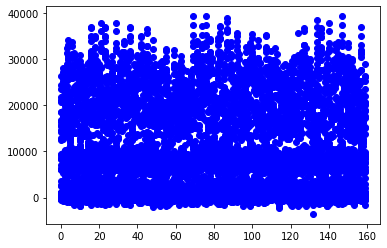

In [26]:
import matplotlib.pyplot as plt
Selector = VarianceThreshold(threshold=0.5)
x = X_train
# y = Selector

plt.plot(x,'o', color='b')
plt.plot(y,'-', color='r')
plt.show()

In [27]:
Selector = VarianceThreshold(threshold=0.5)
X_train = Selector.fit_transform(X_train)
X_train

array([[-3.29900000e-01,  1.08834010e-01,  3.95003000e+01, ...,
         4.45500000e+00,  1.74000000e+02,  8.20065945e+00],
       [-1.18450000e+00,  1.40304025e+00,  5.63007000e+01, ...,
         3.76100000e+00,  1.74000000e+02,  7.58502665e+00],
       [ 2.39000000e-02,  5.71210000e-04,  4.03193000e+01, ...,
         5.47300000e+00,  1.92000000e+02,  8.35654732e+00],
       ...,
       [-9.77800000e-01,  9.56092840e-01,  6.58072000e+01, ...,
         7.50400000e+00,  2.16000000e+02,  8.00436480e+00],
       [-4.46800000e-01,  1.99630240e-01,  3.37560000e+01, ...,
         3.57600000e+00,  1.66000000e+02,  7.52287874e+00],
       [ 5.39100000e-01,  2.90628810e-01,  4.01189000e+01, ...,
         7.56400000e+00,  1.80000000e+02,  6.14935376e+00]])

In [28]:
list_of_names = Selector.get_feature_names_out(input_features=None)

In [29]:
X_train = pd.DataFrame(X_train)
X_train.columns = list_of_names
X_train

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
0,-0.3299,0.108834,39.5003,65.228653,21.0,24.0,53.0,32.0,21.0,24.0,...,448.130218,66.523208,23.122212,7.980207,12.598607,3660.0,50.0,4.455,174.0,8.200659
1,-1.1845,1.403040,56.3007,67.606411,15.0,17.0,59.0,32.0,27.0,24.0,...,438.206719,66.523208,23.515914,7.980207,12.992309,3660.0,50.0,3.761,174.0,7.585027
2,0.0239,0.000571,40.3193,66.479653,21.0,24.0,56.0,35.0,21.0,25.0,...,482.156575,72.159057,27.759960,7.980217,12.622195,4707.0,56.0,5.473,192.0,8.356547
3,-0.4296,0.184556,42.6228,76.076204,22.0,24.0,63.0,35.0,28.0,30.0,...,464.209993,72.577369,13.576254,7.383352,6.192902,4488.0,56.0,9.798,186.0,7.638272
4,-0.6399,0.409472,59.7313,78.211790,18.0,19.0,66.0,36.0,30.0,30.0,...,482.220557,74.417748,16.538268,9.962622,6.575646,4746.0,59.0,8.900,192.0,5.778325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-1.0395,1.080560,40.0833,65.908653,21.0,24.0,54.0,33.0,21.0,25.0,...,439.164440,68.549963,23.077169,7.980215,15.096953,4007.0,52.0,3.707,178.0,7.017729
156,-0.7613,0.579578,43.3476,68.575825,21.0,24.0,58.0,33.0,25.0,25.0,...,443.195740,68.532315,23.618312,7.947877,15.670436,4051.0,50.0,4.322,178.0,7.419075
157,-0.9778,0.956093,65.8072,85.634169,21.0,23.0,73.0,40.0,33.0,32.0,...,539.242021,83.404336,23.314449,13.567397,9.747052,6854.0,66.0,7.504,216.0,8.004365
158,-0.4468,0.199630,33.7560,59.041481,21.0,24.0,47.0,30.0,17.0,22.0,...,420.098918,62.014043,22.964834,7.836884,12.584556,3071.0,45.0,3.576,166.0,7.522879


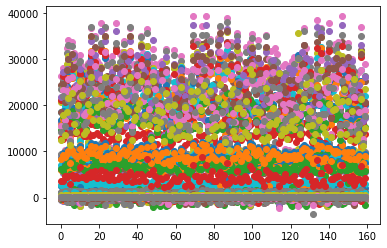

In [30]:
plt.plot(X_train, 'o')
plt.show()

# Export csv

In [31]:
X_train.to_csv('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/X_train.csv', index=False)
y_train.to_csv('/Users/irfanularifa/Documents/TA_FIX/0. Dataset/y_train.csv', index=False)